# Classification

## Introduction

Electricity pricing is a critical aspect of energy markets, influencing both consumers and suppliers. In this project, we analyze electricity price trends in **British Columbia (BC)** and **Alberta (AB)**, Canada, using historical electricity measurements. Our objective is to develop a predictive model that estimates whether the electricity price in British Columbia will **increase (UP)** or **decrease (DOWN)**.

### Problem Statement

Given a dataset containing electricity-related metrics, we aim to predict the **bc_price_evo** variable, which indicates whether the electricity price in BC is increasing or decreasing. The dataset includes:

- **Date and Time of measurement**
- **Electricity Price and Demand** in British Columbia and Alberta
- **Electricity Transfer** between the two regions

The ultimate goal is to build an accurate machine learning model that can effectively classify price movement in BC.


### Evaluation Metric

Our model will be evaluated using the **Accuracy Score**, which measures the percentage of correct predictions.


```math
\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total predictions}}
```

A higher accuracy score indicates a better-performing model.

### Submission Format

The submission should be a CSV file containing the predicted **bc_price_evo** values for each test ID. The format should be:

```csv
id,bc_price_evo 
28855,UP 
28856,UP 
28857,DOWN ...
```


This project will explore various machine learning techniques to improve prediction accuracy and gain insights into electricity price fluctuations.


### Libraries

For this project, we will use some libraries that can help us facilitate the process

In [1]:
import pandas as pd                 # pandas for the data structure manipulation 
import numpy as np                  # numpy for numerical operations
import matplotlib.pyplot as plt     # matplotlib for plotting
#import sklearn as sklearn          # sklearn for machine learning and evaluation (required module will be imported later in each partie)

## Data Processing

This document outlines a step-by-step approach to handling data using Python. The process includes data loading, inspecting, handling missing values, and data normalization.

In [ ]:
data_dir = '../data/classification/'
output_dir = '../output/classification/submission/'

### 1. Loading Data  
The first step is to import the necessary libraries and load the dataset into a Pandas DataFrame.

In [1]:
df_train_raw = pd.read_csv(data_dir + 'train.csv', index_col=0)
df_train_raw.head()

NameError: name 'pd' is not defined

In [ ]:
df_test_raw = pd.read_csv(data_dir + 'test.csv', index_col=0)
df_test_raw.head()

### 2. Data Inspection  

By looking at the trainning and testing dataset, we will see that there are 7 columns, which will provide information for the predictions. Those are:
- `id` - Unique identifier used by Kaggle

- `date` - Date at which the measurement was made, between the 15th of May 2015 and the 13th of December 2017 (normalized between 0 and 1)
- `hour` - Hour of measurement as a half hour period of time over 24 hours (values originally between 0 and 47, here normalized between 0 and 1)
- `bc_price` - Electricity price in British Columbia (normalized between 0 and 1)
- `bc_demand` - Electricity demand in British Columbia (normalized between 0 and 1)
- `ab_price` - Electricity price in Alberta (normalized between 0 and 1)
- `ab_demand` - Electricity demand in Alberta (normalized between 0 and 1)
- `transfer` - Electricity transfer scheduled between British Columbia and Alberta (normalized between 0 and 1)
- `bc_price_evo` - Is the price in British Columbia going UP or DOWN compared to the last 24 hours? This is the target variable (i.e., it is only given during training)

Before processin,  it's essential to check the structure and properties of the data

In [ ]:
df_train_raw.info()
df_train_raw.describe()

In [ ]:
df_test_raw.info()
df_train_raw.describe()

Excellent, it seems that our data is really clean, there is no missing values and complex information are already normalized. So it could be ready for the processing. 

### 3. Data preparing

For the training process, we will need to seperate the data and the predictions (the labels in the `bc_price_evo` column).

In [4]:
df_train = df_train_raw.drop(columns=['bc_price_evo'])
df_train_labels = df_train_raw.loc[:, 'bc_price_evo'].copy()

df_train.head()
df_train_labels.head()

,date,hour,bc_price,bc_demand,ab_price,ab_demand,transfer
id,,,,,,,
0,0.452060,1.000000,0.074096,0.578846,0.005029,0.494821,0.489912
1,0.455555,0.574468,0.033025,0.349003,0.001554,0.264889,0.829386
2,0.027521,0.617021,0.098325,0.533918,0.003467,0.422915,0.414912
3,0.455732,0.936170,0.041822,0.588515,0.002860,0.448731,0.525000
4,0.000044,0.255319,0.051489,0.302440,0.003467,0.422915,0.414912
...,...,...,...,...,...,...,...
28850,0.026503,1.000000,0.082232,0.427551,0.003467,0.422915,0.414912
28851,0.451927,0.574468,0.033626,0.564564,0.002198,0.624806,0.553947
28852,0.907482,0.893617,0.055872,0.329664,0.003695,0.316416,0.602193


id
0          UP
1        DOWN
2          UP
3          UP
4          UP
         ... 
28850      UP
28851    DOWN
28852    DOWN
28853    DOWN
28854    DOWN
Name: bc_price_evo, Length: 28855, dtype: object

For the testing dataset, it's already okay, and we can use the raw data for the prediction. But we want to make things more concurrent, so we will define the save submission function, which will save our predictions in a csv file for the submission.

In [40]:
df_test = df_test_raw.copy()

In [41]:
def save_submission( df_test_labels, name_model  ):
    test = df_test.copy()
    test['bc_price_evo'] = df_test_labels
    test.to_csv(f'../data/classification/submission/{name_model}.csv', columns=['bc_price_evo'])

### 1. Logistic Regression (Son)

Logistic Regression is a statistical method used for binary classification tasks. Unlike linear regression, which predicts continuous values, logistic regression predicts the probability that a given input belongs to a particular class. It applies the **sigmoid function** to transform linear predictions into probability values ranging from 0 to 1.  

**How It Works**:
1. Computes a weighted sum of input features.
2. Applies the **sigmoid function** to map the result to a probability.
3. Uses a decision threshold (typically 0.5) to classify data points into one of two categories.

Logistic Regression is fully integrated by Scikit Learn library in the module linear_model package, and we can use it as our model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

LogisticRegression of ScikitLearn supported a lot of hyperparameters, like `max_iter`, `C` (Inverse of regularization strength), `random_state`, ... And chosing the right hyperparameters for the model is really complicated. To solve this, we decide to do the eastimation of accuracy: we will seperate the training dataset into sub_training dataset and sub_validation dataset, we will use this for the training and validation of our model, and get the accuracy (of course, this is not the actual accuracy, it is only the estimate of the accuracy which will help us somehow decide the better hyperparameters. ).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train_labels, test_size=0.20, random_state=23)
clf = LogisticRegression(max_iter=10000, random_state=0, C=15, class_weight='balanced')
clf.fit(X_train, y_train)

acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

The preceding scripts show how we estimate the accuracy of the model with the hyparameters `max_iter=10000, random_state=0, C=15, class_weight='balanced'`. Doing this with another case, we will have the estimated accuracy tables"

| Solver (d=lbfgs) | C (d=1.0) | Penalty (d=l2) | Class Weight (d=None) | Fit Intercept (d=True) | L1 Ratio (d=None) | Accuracy (%) |
|--------|----|---------|--------------|--------------|----------|--------------|
| default | default | default | default | default | default | 74.01 |
| liblinear | default | default | default | default | default | 73.94 |
| default | 0.01 | default | default | default | default | 62.97 |
| default | 0.1  | default | default | default | default | 66.77 |
| default | 10   | default | default | default | default | 75.05 |
| default | 100  | default | default | default | default | 74.96 |
| default | 15   | default | default | default | default | 75.12 |
| liblinear | 15 | l1 | default | default | default | 75.00 |
| saga | 15 | elasticnet | default | default | 0.5 | 75.08 |
| default | 15 | default | balanced | default | default | 75.13 |
| default | 15 | default | balanced | False | default | 71.65 |


By looking at the table below, the highest estimated accuracy is `max_iter=10000, random_state=0, C=15, class_weight='balanced'` with accuracy = 75.12%. So we can use this for our model

In [ ]:
clf = LogisticRegression(max_iter=10000, random_state=0, C=15, class_weight='balanced')
clf.fit(df_train, df_train_labels)
test_labels = clf.predict(df_test)

In [ ]:
#concat test_labels to df_test index
save_submission(test_labels, 'LogisticRegression')

Our predictions is saved in csv file, and we now can send it to Kaggle for the submission. The result is 0.7284, not too high but still a good value.

## Decision Tree (Tu)

In [ ]:
save_submission(test_labels, 'DecisionTree')

## Random Forest (Tho)


### 4.Support Vector Machine (SVM)

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification and regression tasks.  
It works by finding the optimal hyperplane that best separates data points into different classes.  

Key concepts of SVM include:  
- **Margin Maximization**: SVM aims to maximize the margin between the closest data points (support vectors) and the decision boundary.  
- **Kernel Trick**: SVM can handle non-linearly separable data by using kernel functions (e.g., linear, polynomial, RBF) to map data into a higher-dimensional space.  
- **Regularization (C Parameter)**: Controls the trade-off between achieving a low error rate and maintaining a large margin.  

SVM is fully integrated by Scikit Learn library in the module svm package with the class SVC, and we can use it as our model.

In [ ]:
from sklearn.svm import SVC
from matplotlib.pylab import RandomState

Like the process of estimation accuracy we have used in LogisticRegression, we will do the same thing to choose the hyperparameters we want.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train_labels, test_size=0.20, random_state=RandomState())
svm = SVC(kernel="rbf", gamma=20, C=100.0, class_weight='balanced', max_iter=100000)
svm.fit(X_train, y_train)
acc = accuracy_score(y_test, svm.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

And the estimated accuracy tables we get is:

| Kernel (d='rbf') | Gamma (d='scale') | C (d=1.0)     | Degree (d=3) | Coef0 (d=0.0) | Class Weight (d=None) | Max Iter (d=-1) | Accuracy (%) |
|---------|--------|--------|--------|-------|--------------|-----------|--------------|
| rbf     | 0.5    | 1.0    | default | default | default | default | 76.33 |
| rbf     | 0.5    | 10.0   | default | default | default | default | 77.39 |
| rbf     | 0.5    | 100.0  | default | default | default | default | 78.39 |
| rbf     | default| 100.0  | default | default | default | default | 79.83 |
| linear  | default| 100.0  | default | default | default | default | 74.75 |
| sigmoid | default| 100.0  | default | default | default | default | 43.20 |
| poly    | default| 100.0  | default | default | default | default | 76.42 |
| rbf     | scale  | 100.0  | default | default | default | default | 79.83 |
| rbf     | auto   | 100.0  | default | default | default | default | 76.78 |
| rbf     | 0.01   | 100.0  | default | default | default | default | 75.60 |
| rbf     | 0.1    | 100.0  | default | default | default | default | 76.76 |
| rbf     | 1      | 100.0  | default | default | default | default | 78.66 |
| rbf     | 5      | 100.0  | default | default | default | default | 80.70 |
| rbf     | 10     | 100.0  | default | default | default | default | 81.37 |
| rbf     | 20     | 100.0  | default | default | default | default | 82.05 |
| rbf     | 20     | 100.0  | default | default | balanced | 100000    | 82.12 |
| rbf     | 0.05   | 10.0   | 3      | default | default | default | 75.05 |
| rbf     | 0.05   | 10.0   | 3      | 1      | balanced | 5000      | 75.05 |


And the best hyperparameters we get according to the table is: `kernel="rbf", gamma=20, C=100.0, class_weight='balanced', max_iter=-1`

In [ ]:
svm = SVC(kernel="rbf", gamma=20, C=100.0, class_weight='balanced', max_iter=-1) #82.12%
svm.fit(df_train, df_train_labels)
test_labels = svm.predict(df_test)

In [ ]:
save_submission(test_labels, 'SVM')

Our predictions is saved in csv file, and we now can send it to Kaggle for the submission. The result is 0.8176, not too high but still a good value.

## Naive Bayes (Tu)


## K-Nearest Neighbors (KNN) (Tho)

/Users/vutho/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/vutho/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

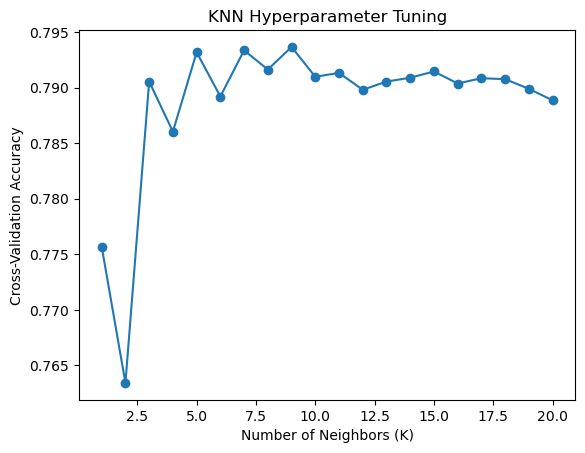

Best K: 9


/Users/vutho/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Validation Accuracy: 0.7870


/Users/vutho/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df_train = pd.read_csv('../data/classification/train.csv', index_col=0)
df_test = pd.read_csv('../data/classification/test.csv', index_col=0)

# Features & Target
X = df_train.drop(columns=['bc_price_evo'])  # Drop the target variable
y = df_train['bc_price_evo']  # Target variable

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (KNN is sensitive to scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Find the best K using cross-validation
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot K vs. Accuracy
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.show()

# Choose the best K
best_k = k_values[np.argmax(cv_scores)]
print(f"Best K: {best_k}")

# Train final model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

# Evaluate on validation set
y_pred = knn.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Predict on test data
df_test_scaled = scaler.transform(df_test)
df_test_labels = knn.predict(df_test_scaled)

# Save the submission
def save_submission(df_test_labels, name_model):
    submission = pd.DataFrame({'id': df_test.index, 'bc_price_evo': df_test_labels})
    submission.to_csv(f'../data/classification/submission/{name_model}.csv', index=False)

save_submission(df_test_labels, "knn_model")

